# Applied statistics project
## feb - 2020
### Author Manoj Mariappan

### 1. Import the necessary libraries

In [1]:
import statistics
import pandas as pd  #pandas for reading data frame
from numpy import percentile #to calculate the percentile for quartiles
import seaborn as sns # to display the distribution of the columns
import matplotlib.pyplot as plt # to show the plots of graphs 
#from scipy.stats import f
from statsmodels.stats.proportion import proportions_ztest #to perform z-test for significant difference checking
from scipy.stats import ttest_1samp,ttest_ind,f
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 2. Read the data as a data frame

In [2]:
df = pd.read_csv('Data/insurance.csv')     #reading the csv file as a dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 3.A. EDA - shape of the Data

In [6]:
df.shape #shows the dimension shape of the date here it is 1338 entries and 7 features

(1338, 7)

### 3.B.Type of the Data

In [4]:
df.head() #to display the first five rows of every colums to explore what data we are handling. Generic view of the data how it looks like

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- age - age of the person
- sex - gender of the person
- children - number of children the person has
- bmi - body mass index of the person
- smoker - does the person smokes or not
- region - determines which region the person belongs to
- charges - medical charges of a person from insurance

In [8]:
df.dtypes  # shows the types of all the data

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

- age, children is of integer type
- bmi and charges is of float
- sex, smoker, region are of object types

In [10]:
df.info() # shows the information of what type and how many entries it has and is it null or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### this shows the data is with 1338 rows and 7 columns

In [11]:
df.size #shows the size of the dataframe

9366

- it has a total number of 9336 values in it

### 3.C. Checking the presence of missing values

In [12]:
df.isnull() #checking if there is a null value in the entries

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

prints how many null elements present

### 3.D. 5 point summary of numerical attributes

In [14]:
df.describe() #shows the summary of the dataframe here the 5 point summary is also included

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- we can see the mean, median, standard deviation, min, max etc from this 5 point summary of all numerical values
- the man and 50 percent of age, bmi and children are almost same so the data is uniformly distributed
- there is positive skeness in charges

In [15]:
df.describe(include ="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


- smoker seems to have 2 unique values its binary yes or no
- region has 4 different values

In [16]:
df.mean() #shows the mean value 

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [17]:
df.min() #shows the min value

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object

In [18]:
df.max() #shows the max value

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

we have already seen the min, max and mean values from the 5 point summary

#### Three quartiles for age using percentile in numpy

In [19]:
twentyfive_age = percentile(df.age,[25])
print("25% of age")
twentyfive_age

25% of age


array([27.])

In [20]:
fifty_age = percentile(df.age,[50])
print("50% of age")
fifty_age

50% of age


array([39.])

In [21]:
seventyfive_age = percentile(df.age,[75])
print("75% of age")
seventyfive_age

75% of age


array([51.])

#### Three quartiles for bmi using percentile in numpy

In [22]:
twentyfive_bmi = percentile(df.bmi,[25])
print("25% of bmi")
twentyfive_bmi

25% of bmi


array([26.29625])

In [23]:
fifty_bmi = percentile(df.bmi,[50])
print("50% of bmi")
fifty_bmi

50% of bmi


array([30.4])

In [24]:
seventyfive_bmi = percentile(df.bmi,[75])
print("75% of bmi")
seventyfive_bmi

75% of bmi


array([34.69375])

#### Three quartiles for children using percentile in numpy

In [25]:
twentyfive_children = percentile(df.children,[25])
print("25% of children")
twentyfive_children

25% of children


array([0.])

In [26]:
fifty_children = percentile(df.children,[50])
print("50% of children")
fifty_children

50% of children


array([1.])

In [27]:
seventyfive_children = percentile(df.children,[75])
print("75% of children")
seventyfive_children

75% of children


array([2.])

#### Three quartiles for charges using percentile in numpy

In [28]:
twentyfive_charges = percentile(df.charges,[25])
print("25% of charges")
twentyfive_charges

25% of charges


array([4740.28715])

In [29]:
fifty_charges = percentile(df.charges,[50])
print("50% of charges")
fifty_charges

50% of charges


array([9382.033])

In [30]:
seventyfive_charges = percentile(df.charges,[75])
print("75% of charges")
seventyfive_charges

75% of charges


array([16639.912515])

we have seen the quartiles of all numerical values above

### 3.E. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

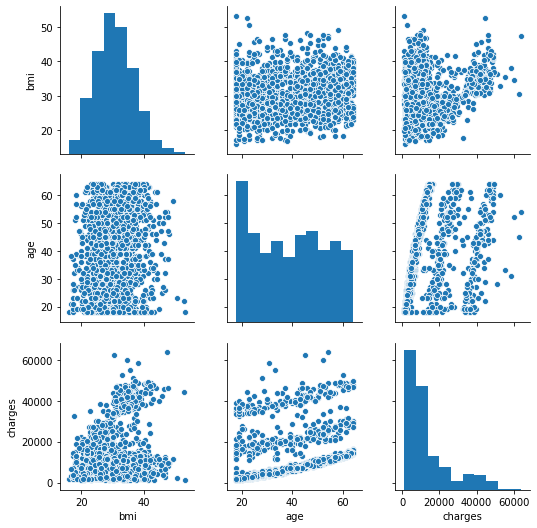

In [33]:
# seaborn and matplotlib is used to display the distribution of the three colums bmi, age and charges against themselves and one another
sns.pairplot(df[['bmi','age','charges']])
plt.show()

- there is some linear relationship between chares and age

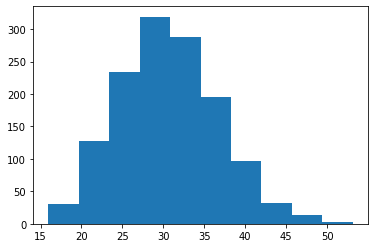

In [34]:
plt.hist(df.bmi) #histogram for individual distribution of bmi
plt.show()

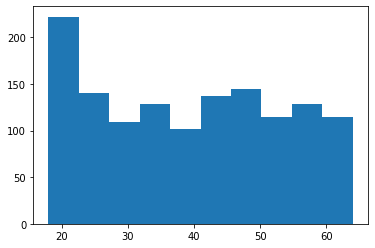

In [35]:
plt.hist(df.age) #histogram for individual distribution of age
plt.show()

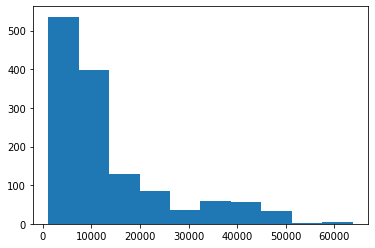

In [36]:
plt.hist(df.charges) #histogram for individual distribution of charges
plt.show()

### 3.F. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [37]:
df.skew()  #skewness of all the colums which is numerical data

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#### skewness of individual bmi , age and columns

In [38]:
#skewness of bmi
bmi = df['bmi']
bmi_skew = bmi.skew()
print("bmi Skew = ",bmi_skew)

bmi Skew =  0.2840471105987448


In [39]:
#skewness of age
age = df['age']
age_skew = age.skew()
print("age Skew = ",age_skew)

age Skew =  0.05567251565299186


In [40]:
#skewness of charges
charges = df['charges']
charges_skew = charges.skew()
print("charges Skew = ",charges_skew)

charges Skew =  1.5158796580240388


### 3.G.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

#### since it is the checking of the presence of outliers i have done using a box plot the points beyond the max whiskers are outliers
#### we do not have outliers below the minimum whisker here

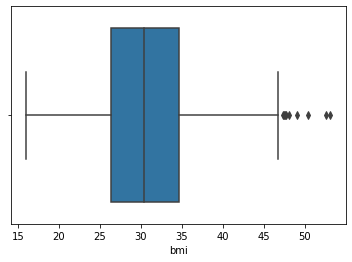

In [41]:
#boxplot shows the presence of outliers in bmi which is outside of the max whisker
sns.boxplot(df['bmi'])
plt.show()


#### There are outliers for BMI

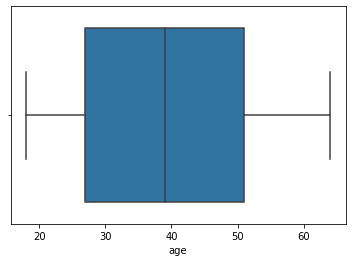

In [42]:
#boxplot shows the presence of outliers in age which is outside of the max whisker
#visually there are no outliers
sns.boxplot(df['age'])
plt.show()

#### There are no outliers for AGE

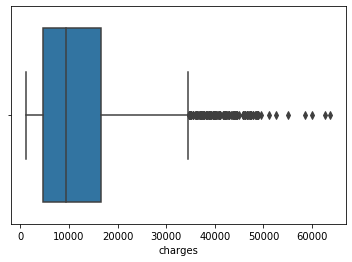

In [43]:
#boxplot shows the presence of outliers in charges which is outside of the max whisker
sns.boxplot(df['charges'])
plt.show()

#### There are outliers for Charges

### 3.H.Distribution of categorical columns

#### i have used three different kind of categorical plot to show the distribution of the colums
#### swarm for sex , violin for smoker and bar for region
#### i have done the plotting against age

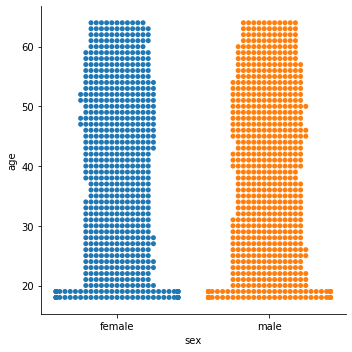

In [44]:
#swarm plot to show distribution of sex over age
sns.catplot(x='sex',y='age', kind = 'swarm', data=df);
plt.show()

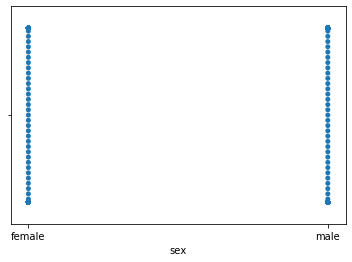

In [45]:
# showing the univariate distribution of gender in swarmplot 
sns.swarmplot(df['sex']);
plt.show()

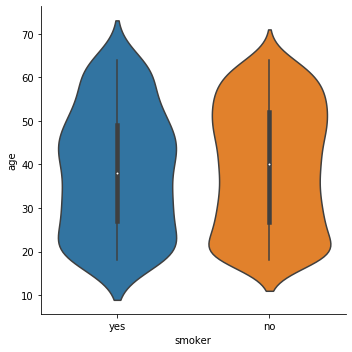

In [46]:
#swarm plot to show distribution of smoker over age
sns.catplot(x='smoker',y='age',kind ='violin',data=df);
plt.show()

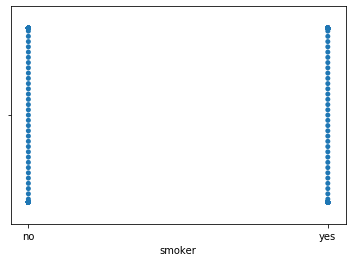

In [47]:
# showing the univariate distribution of smoker in swarmplot 
sns.swarmplot(df['smoker']);
plt.show()

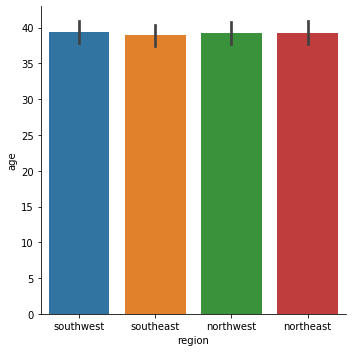

In [48]:
#swarm plot to show distribution of region over age
sns.catplot(x='region',y='age',kind = 'bar',data = df);
plt.show()

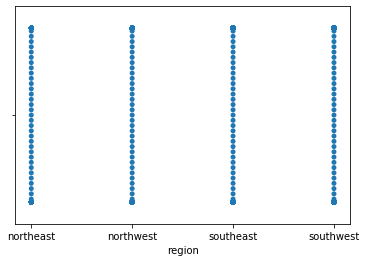

In [49]:
# showing the univariate distribution of region in swarmplot 
sns.swarmplot(df['region']);
plt.show()

### 3.I.Pair plot that includes all the columns of the data frame
####  I have shown the Categories in hues with three pairplots for sex, smoker and region each

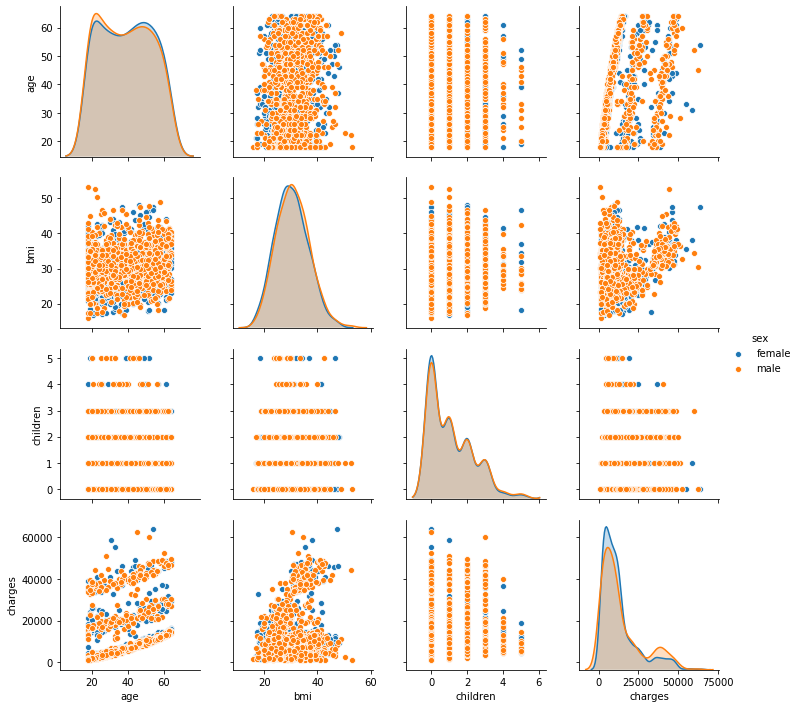

In [50]:
#pairplot for all the colums with sex as hue
sns.pairplot(df,hue='sex') 
plt.show()

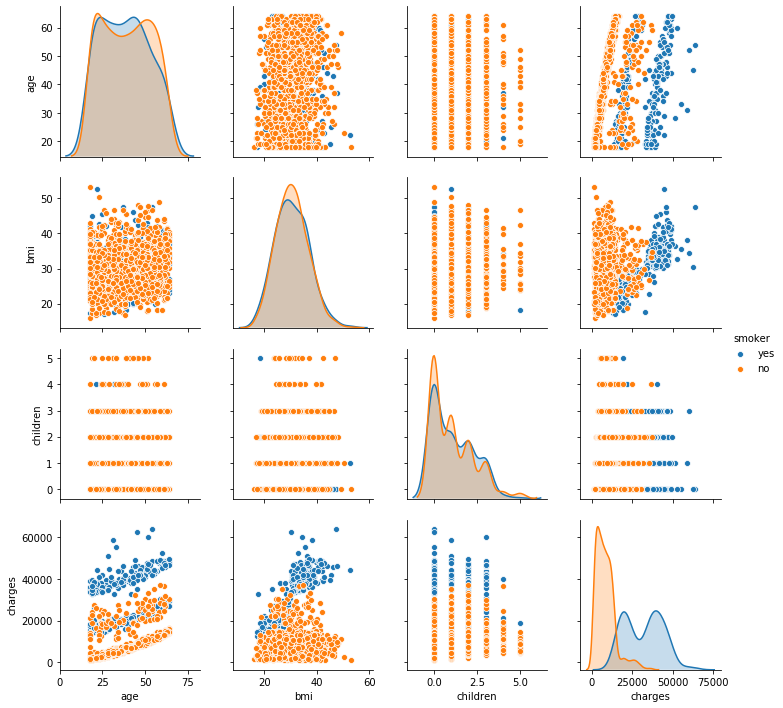

In [51]:
#pairplot for all the colums with smoker as hue
sns.pairplot(df,hue='smoker')
plt.show()

- the charges for non smokers is less

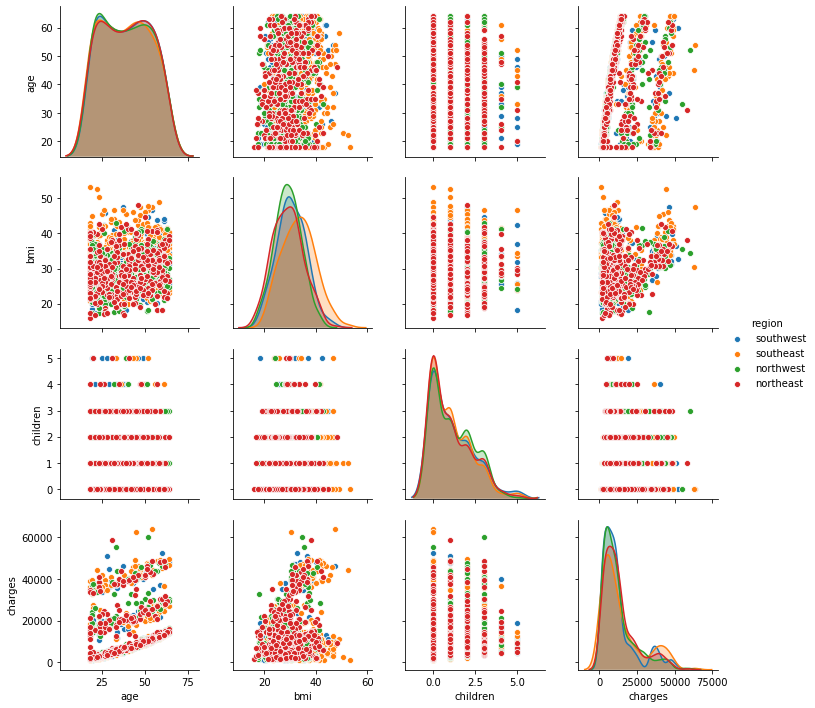

In [53]:
#pairplot for all the colums with region as hue
sns.pairplot(df,hue='region')
plt.show()

### 4. A.Do charges of people who smoke differ significantly from the people who don't?

In [54]:
#smokers = df[df['smoker']=='yes']
#non_smokers = df[df['smoker']=='no']

In [55]:
#grouping smokers and non smokers
smokers_A = df[df['smoker']=='yes']
non_smokers_A = df[df['smoker']=='no']
non_smokers_A.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [56]:
m1 = smokers_A.charges

In [57]:
m2 = non_smokers_A.charges

In [58]:
t_statistic , p_value = ttest_ind(m1,m2)
print(t_statistic,p_value)

46.664921172723716 8.271435842177219e-283


In [59]:
if p_value < 0.05:
    print("the difference in Charges of smokers and non smokers are significantly high")
else: 
    print("the Difference in Charges of smokers and non smokres are not significantly high")

the difference in Charges of smokers and non smokers are significantly high


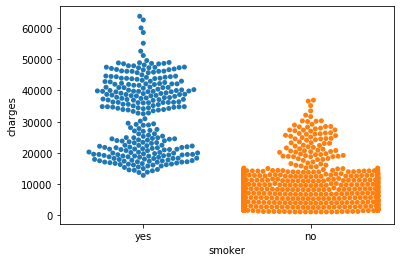

In [60]:
# since it is asked only to check if the charges vary in a significant way. we can most likely check it just with visualization with the numeric scale on y axis
sns.swarmplot(df['smoker'],df['charges'])
plt.show()

#### From the statistical point of view the Charges are significantly higher for the smokers

### 4.A.Does bmi of males differ significantly from that of females?

In [61]:
male_bmi = df[df['sex']=='male']
female_bmi = df[df['sex']=='female']


In [62]:
men_m = male_bmi.bmi

In [63]:
women_f = female_bmi.bmi

In [64]:
t_statistic , p_value = ttest_ind(men_m,women_f)
print(t_statistic,p_value)

1.696752635752224 0.08997637178984932


In [65]:
if p_value < 0.05:
    print("the difference in bmi of male and female are significantly high")
else: 
    print("the Difference in Charges of male and female are not significantly high")

the Difference in Charges of male and female are not significantly high


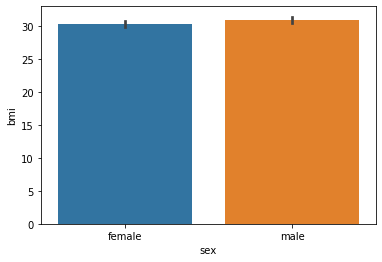

In [66]:
sns.barplot(df['sex'],df['bmi'])
plt.show()

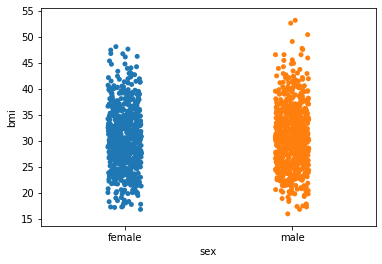

In [67]:
# same as the previous case just visualization will help us figure it out the above barplot as well as the below striplot explains it
sns.stripplot(df['sex'],df['bmi'], jitter=True)
plt.show()

### 4. C. is the proportion of smokers significantly different in different genders

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
smokers = df[df['smoker']=='yes']
non_smokers = df[df['smoker']=='no']
smokers.shape
#male_smokers.shape

(274, 7)

In [70]:
#number of total male
male_count = df[df['sex']=='male'].count()
#all_male = male_count.count()
#all_male
all_male = male_count.smoker
all_male

676

In [71]:
#number of total female
female_count = df[df['sex']=='female'].count()
all_female = female_count.smoker
all_female

662

In [72]:
male_smokers = df[(df['smoker']=='yes') & (df['sex']=='male')]
male_smokers.shape
#male smoker

(159, 7)

In [73]:
#male smokers
m_c = male_smokers.smoker.count()
m_c

159

In [74]:
#female smokers 
female_smokers = df[(df['smoker']=='yes')&(df['sex']=='female')]
female_smokers.shape

(115, 7)

In [75]:
#female smokers
f_c = female_smokers.smoker.count()
f_c

115

In [76]:
stat, pval = proportions_ztest([f_c,m_c],[all_female,all_male])
pval

0.005324114164320532

In [77]:
if pval < .05:
    print("yes the difference is signigicant for smokers in different genders")
else:
    print("no the difference is not significant for smokers in different genders")

yes the difference is signigicant for smokers in different genders


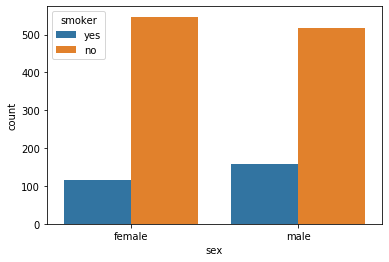

In [79]:
# count plot to show the count of the number of smokers in both genders
sns.countplot(df['sex'],hue=df['smoker'])
plt.show()

#### Yes statistically the proportions of smokers is significantly different in different genders

### 4. D.Is the distribution of bmi across women with no children, one child and two children, the same

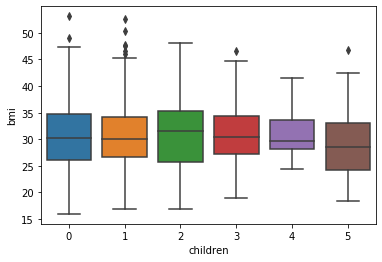

In [80]:
sns.boxplot(df['children'],df['bmi'])
plt.show()
# here we can see the 5 point summary from box plot hence we can figure out if they are the same. 
# the distribution of bmi is not the same.

In [81]:
zero_child = df[df['children'] == 0]
zero_child_count = zero_child['bmi'].count()
mean_zero = zero_child['bmi'].mean()
sd_zero = statistics.stdev(zero_child['bmi'])
print("count = ",zero_child_count,", mean = ",mean_zero,", standard deviation = ",sd_zero)

count =  574 , mean =  30.550296167247392 , standard deviation =  6.039106161346496


In [82]:
one_child = df[df['children'] == 1]
one_child_count = one_child['bmi'].count()
mean_one = one_child['bmi'].mean()
sd_one = statistics.stdev(one_child['bmi'])
print("count = ",one_child_count,", mean = ",mean_one,", standard deviation = ",sd_one)

count =  324 , mean =  30.623148148148143 , standard deviation =  6.101434609988507


In [83]:
two_child = df[df['children'] == 2]
two_child_count = two_child['bmi'].count()
mean_two = two_child['bmi'].mean()
sd_two = statistics.stdev(two_child['bmi'])
print("count = ",two_child_count,", mean = ",mean_two,", standard deviation = ",sd_two)

count =  240 , mean =  30.97810416666667 , standard deviation =  6.509644393939459


In [84]:
new_dataframe = pd.DataFrame()
df0 = pd.DataFrame({'children':0,'bmi':zero_child['bmi']})
df1 = pd.DataFrame({'children':1,'bmi':one_child['bmi']})
df2 = pd.DataFrame({'children':2,'bmi':two_child['bmi']})
new_dataframe = new_dataframe.append(df0)
new_dataframe = new_dataframe.append(df1)
new_dataframe = new_dataframe.append(df2)


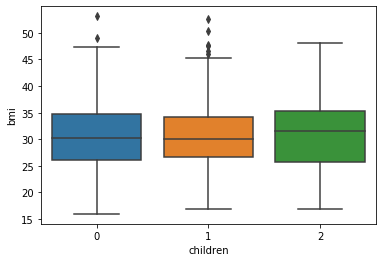

In [85]:
sns.boxplot(x='children',y='bmi',data=new_dataframe)
plt.show()

In [86]:
mod = ols('bmi ~ children',data = new_dataframe).fit()

aov_table = sm.stats.anova_lm(mod,typ = 2)
print(aov_table)

                sum_sq      df         F    PR(>F)
children     27.272296     1.0  0.719586  0.396458
Residual  43054.351120  1136.0       NaN       NaN


#### here the p value is .39 which is higher than the 5% so the distribution is same for the 40% of the population of the women with zero one and two children